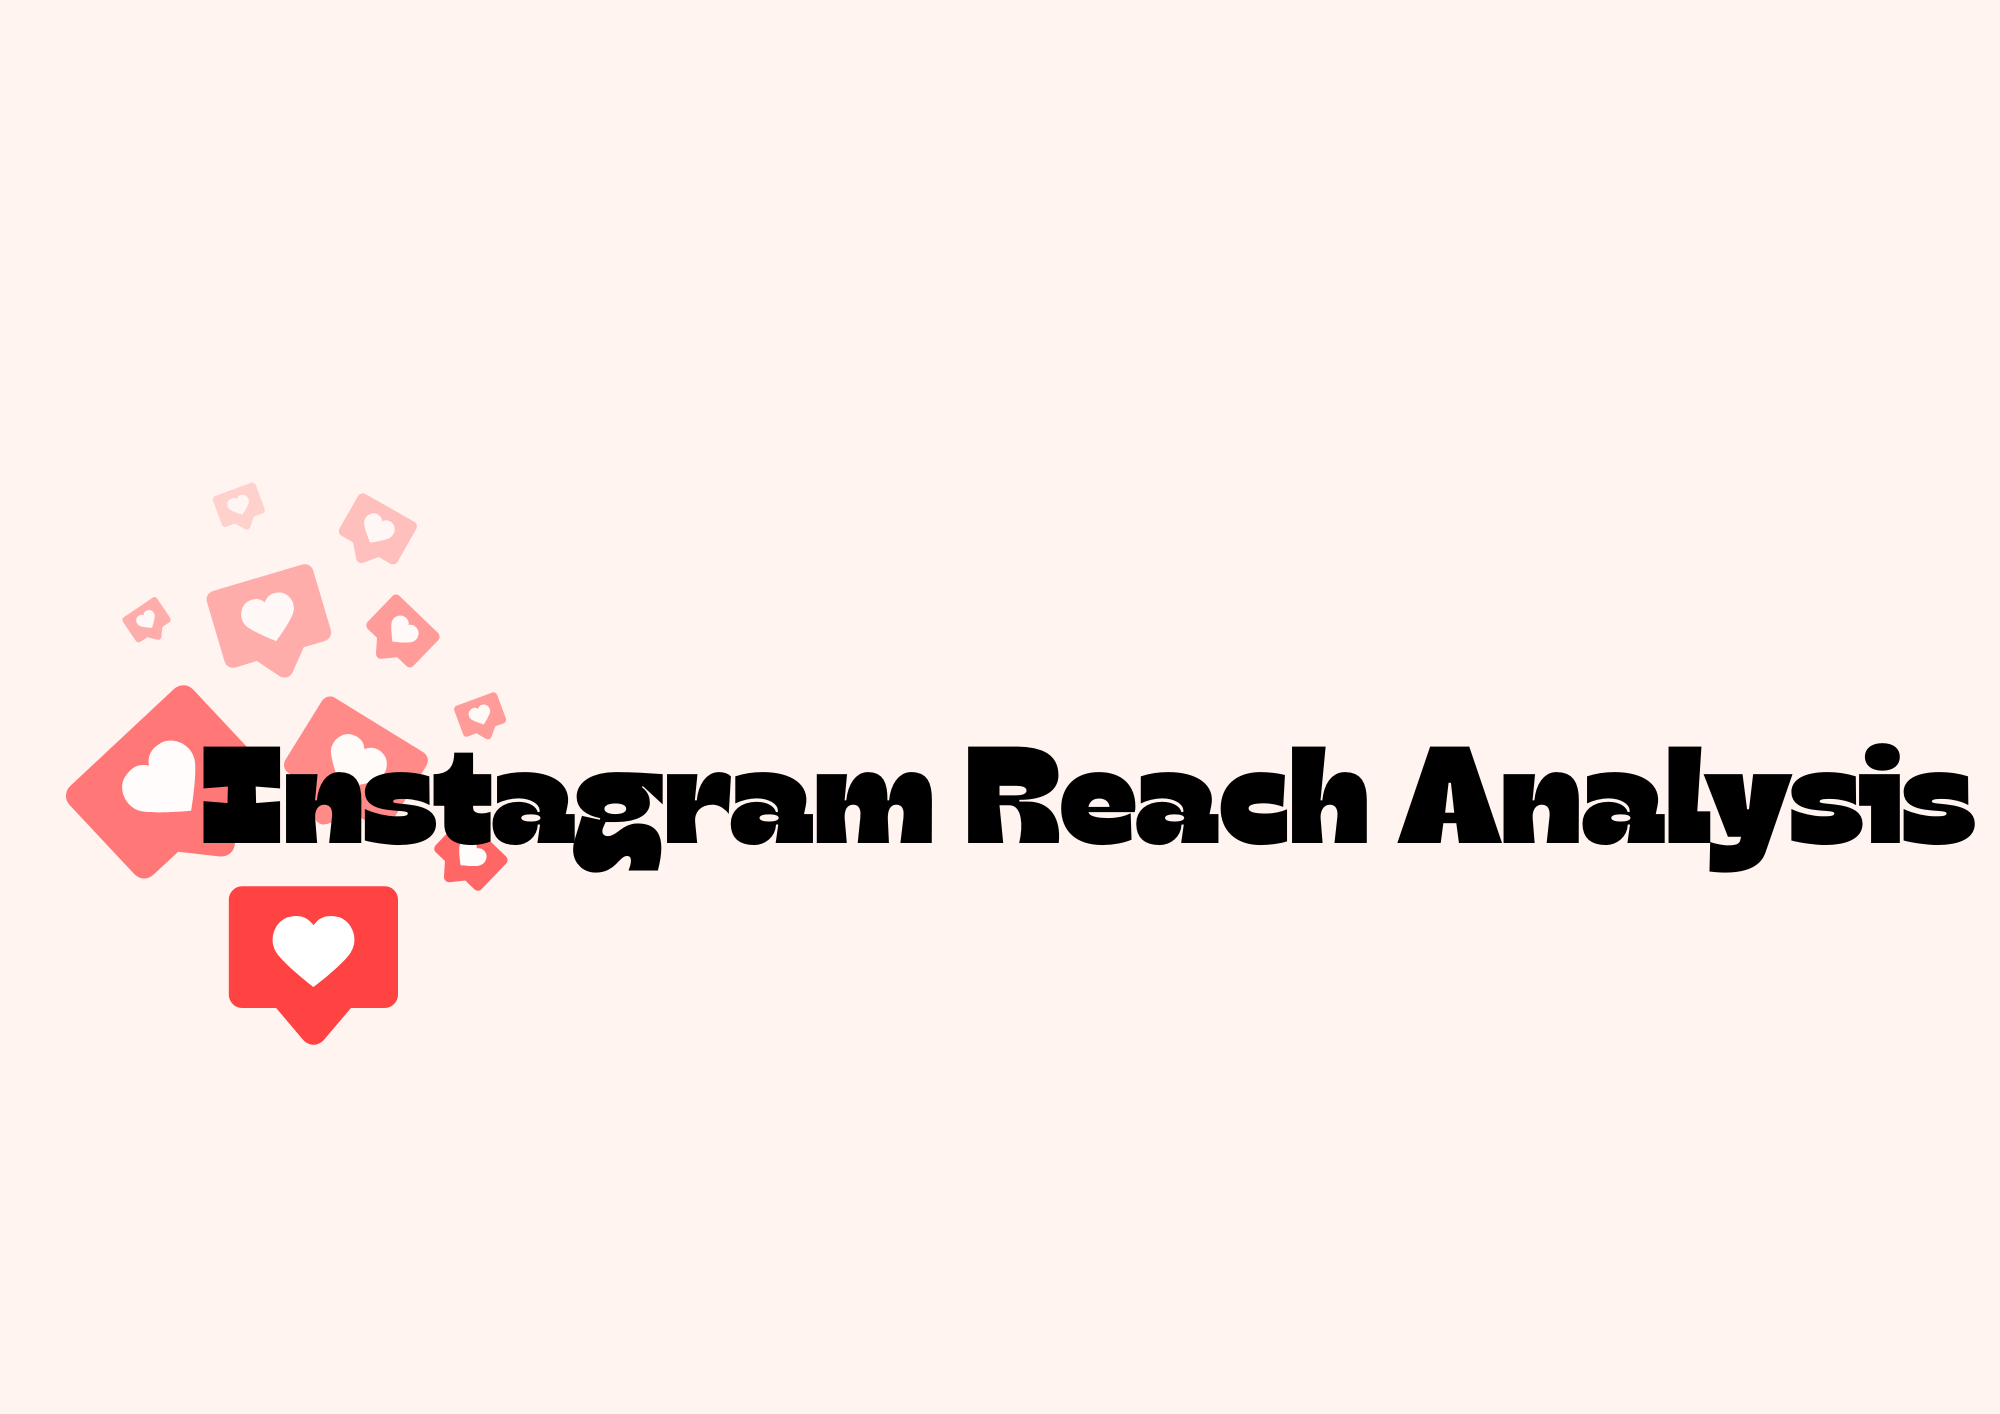

Instagram Reach is a key performance metric that indicates the number of unique users who have seen a post, story, or profile. Unlike impressions (which count total views, including repeats), reach focuses on how many individual users were exposed to the content. Analyzing reach helps understand the effectiveness of content strategy, posting time, hashtags, and audience engagement.<br>
<u>This analysis aims to:</u>
<li>Explore trends in reach across different posts or time periods.
<li>Identify the type of content that reaches more users.
<li>Compare reach with other engagement metrics like likes, comments, and shares.
<li>Provide insights to optimize future content for greater visibility.
 


<h3> Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import warnings
warnings.filterwarnings('ignore')

<h3> Loading Dataset

In [2]:
data =pd.read_csv("Instagram data.csv", encoding = 'latin1')
print(data)

     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follo

<h3>Summary of Data

This function in Pandas gives a concise summary of a DataFrame — ideal for getting an overview of your data's structure, column types, and missing values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


<h3>Checking Null Values

In [4]:
data.isnull().sum()*100

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Here we are using isnull function to check null values.From the above analysis we can clearly understand that the dataset has no missing values in any column.

<h3> Checking Descriptive Statistics 




The <b>.describe()</b> function in Pandas is used to generate summary statistics of a DataFrame's numeric columns. It helps quickly understand the distribution and spread of your data.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.991597,4843.780105,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.789916,1489.386348,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.512605,1884.361443,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.100840,2613.026132,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.092437,289.431031,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.310924,156.317731,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.663866,3.544576,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.361345,10.089205,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.781513,82.378947,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.621849,87.088402,4.0,15.0,23.0,42.0,611.0


<h3> Checking Duplicates

In [6]:
print("Number of Duplicate Values:",data.duplicated().sum())

Number of Duplicate Values: 17


<h3> Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the structure, patterns, and relationships in the data before building any models. It includes:
<li>Viewing the shape of the dataset and basic info (columns, types, missing values)
<li>Exploring distributions of key columns 
<li>Identifying correlations between variables
<li>Visualizing data using graphs and charts (histograms, boxplots, heatmaps, etc.)
EDA helps in spotting outliers, trends, and deciding which features are important for further analysis or modeling.

<h3>1. Histogram -Distribution of Metrics

In [7]:
# List of engagement metrics
metrics = ['Likes', 'Comments', 'Impressions', 'Follows', 'Saves', 'Shares', 'Profile Visits']

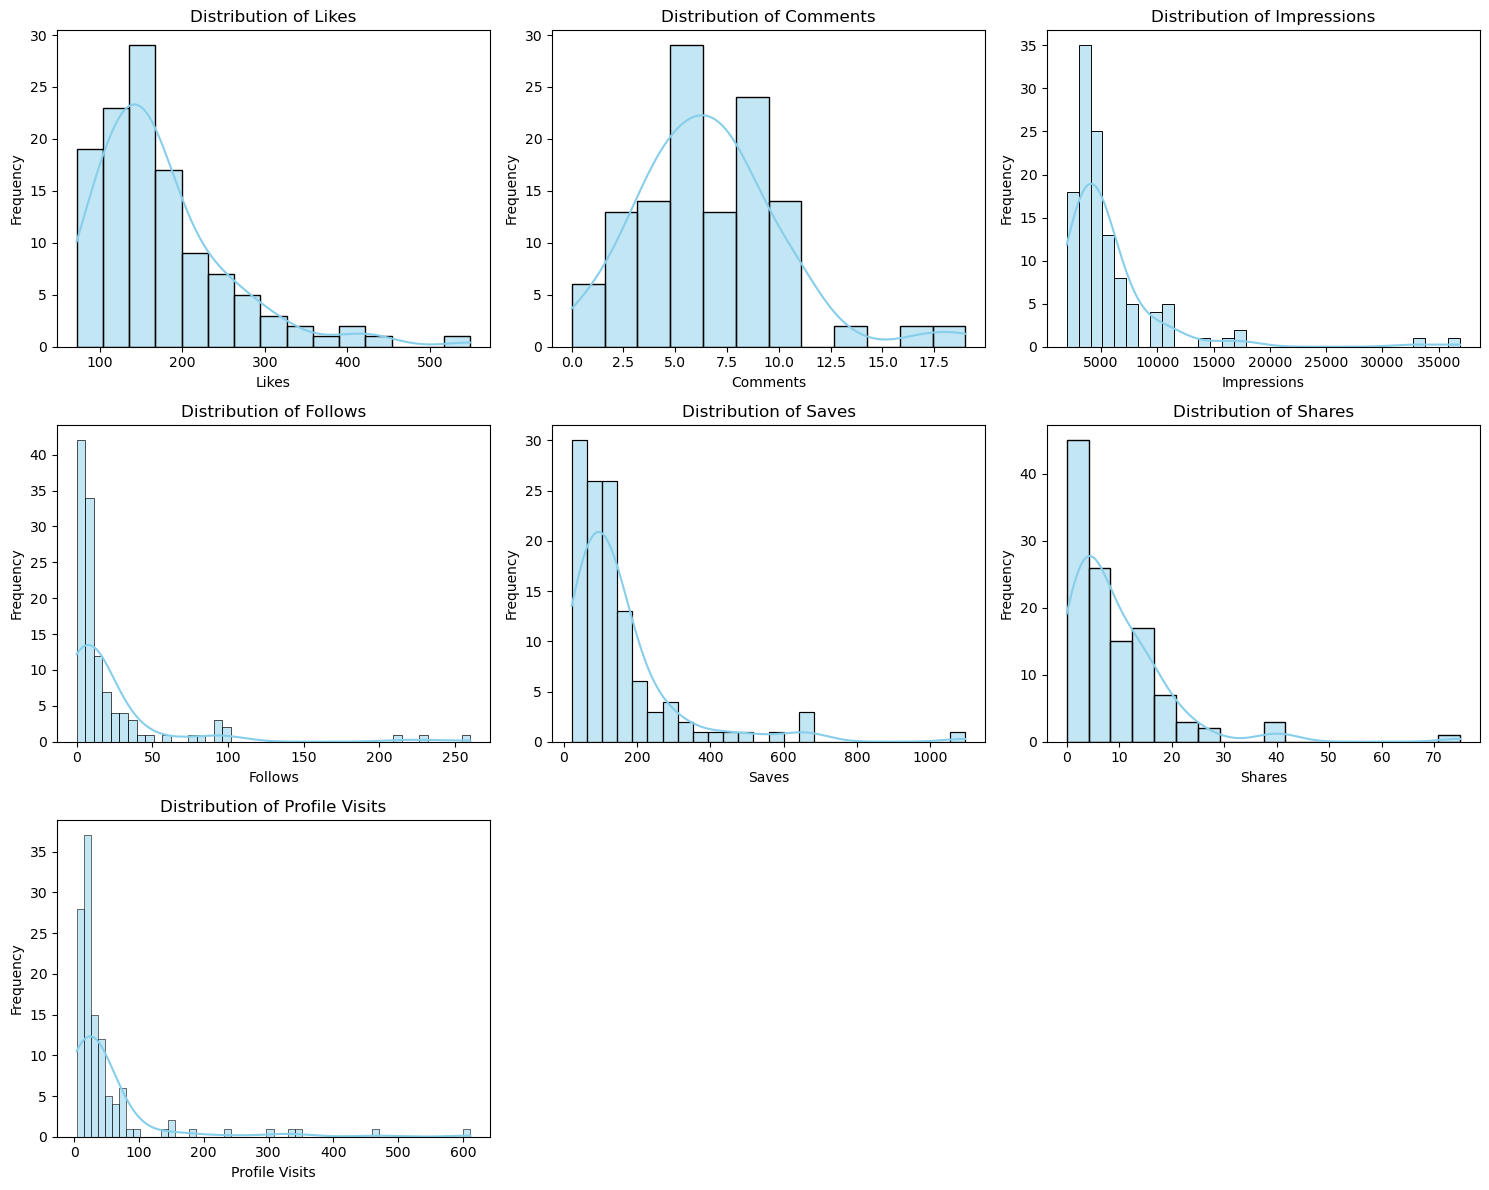

In [8]:

# Plot histograms
plt.figure(figsize=(15, 12))

for i, col in enumerate(metrics): #The Python function enumerate() is used to loop through a sequence (like a list or tuple)
    #and get both the index and the value at the same time.
    plt.subplot(3, 3, i + 1) # plt.subplot(n_rows, n_columns, plot_position)used to create multiple plots in one figure,
    #arranged in a grid layout.
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Observation from Histogram Plots<br>
The histograms above show the distribution of key Instagram engagement metrics across different posts.<br>
Key Insights:<br>
<li>Most metrics like Likes, Impressions, Follows, Shares, Saves, and Profile Visits are right-skewed. This means a majority of 
    posts receive lower engagement, while a few perform exceptionally well.
<li>Comments appear to have a more even spread, suggesting consistent interaction across posts.
<li>There are noticeable outliers (e.g., very high Likes or Impressions), which could be from viral or promoted content.
<li>The frequency of lower values indicates that most posts perform within a limited range of engagement.
These patterns can help identify which posts stand out and guide further analysis or strategy planning.

<h3>2. Box Plot-Outlier and Spread Detection

Why Boxplot? <br>Boxplots help us understand the distribution, spread, and outliers in each engagement metric. They are especially useful for identifying extreme values and comparing multiple features at once.

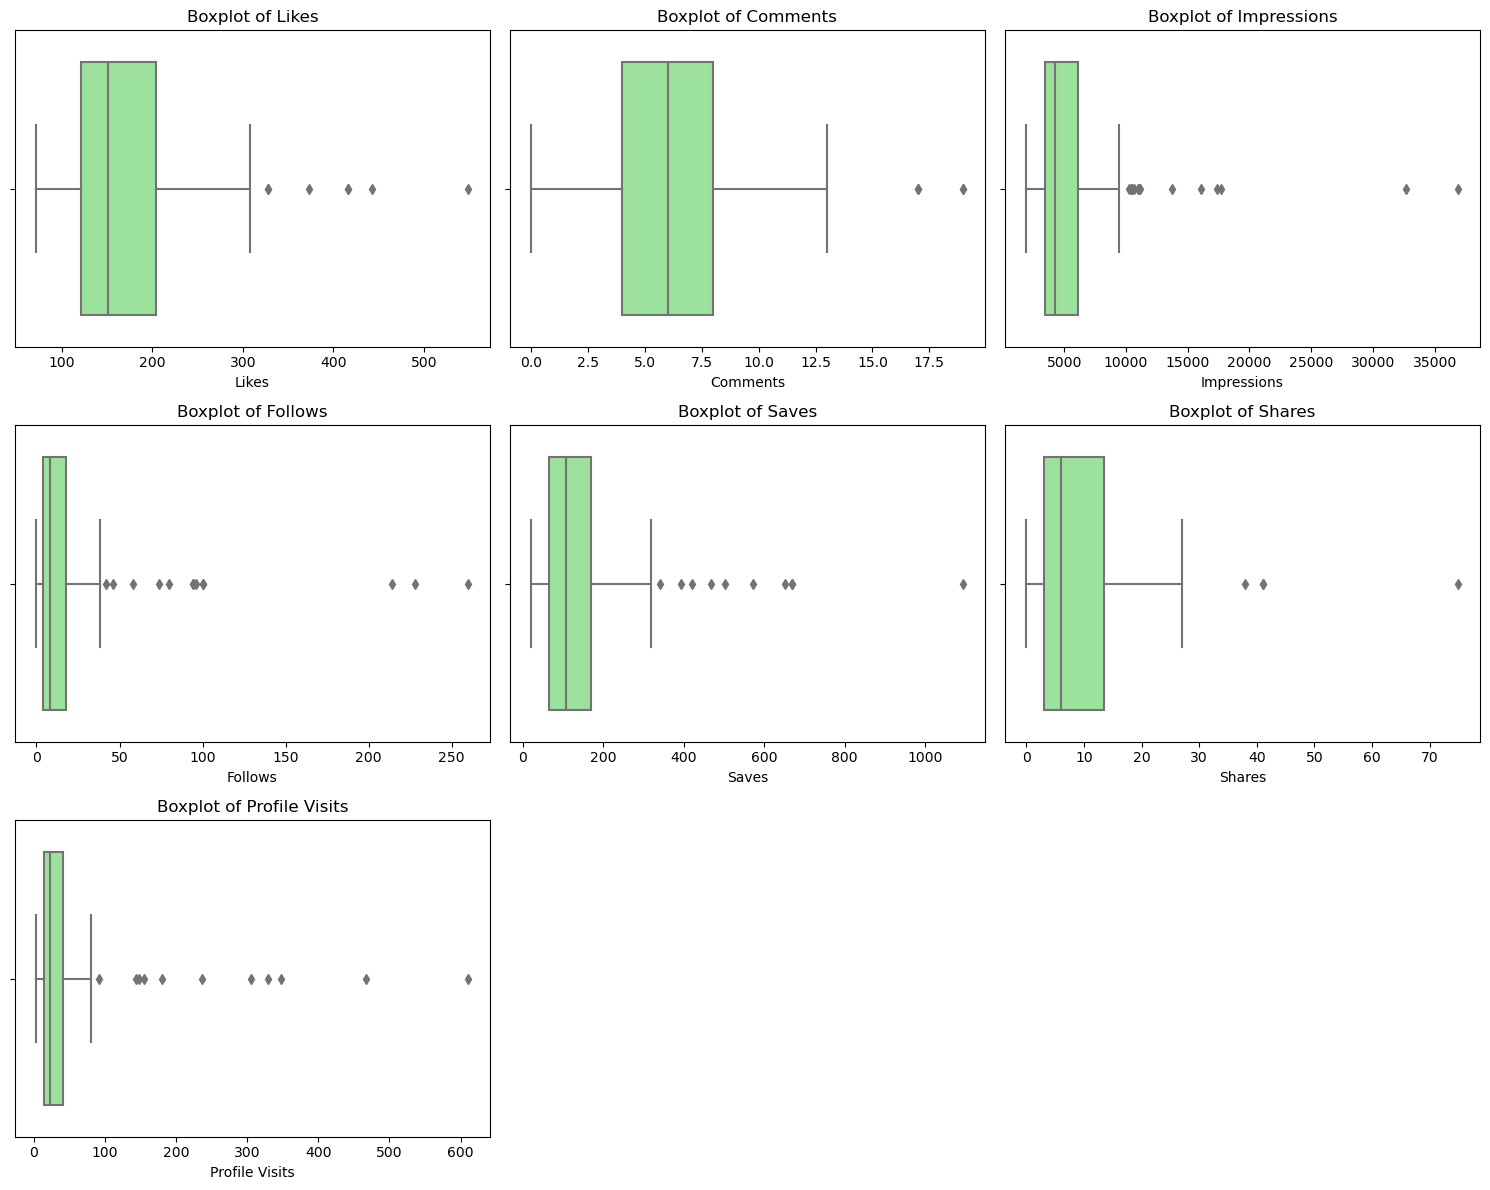

In [9]:
# Plot boxplots
plt.figure(figsize=(15, 12))

for i, col in enumerate(metrics):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


Boxplot Summary<br>
The boxplots show how different Instagram metrics (Likes, Comments, Impressions, Follows, Saves, Shares, and Profile Visits) are spread out across posts.<br>
What we can see:<br>
<li>Most of the data is grouped at lower values.<br>
<li>There are some outliers (dots outside the lines), which means a few posts got very high engagement.<br>
<li>The boxes are small in many plots, showing that most posts perform similarly, while a few do much better.<br>
<li>This helps us quickly see which posts had unusual performance.<br>



<h3> 3. Pie 
    plot 

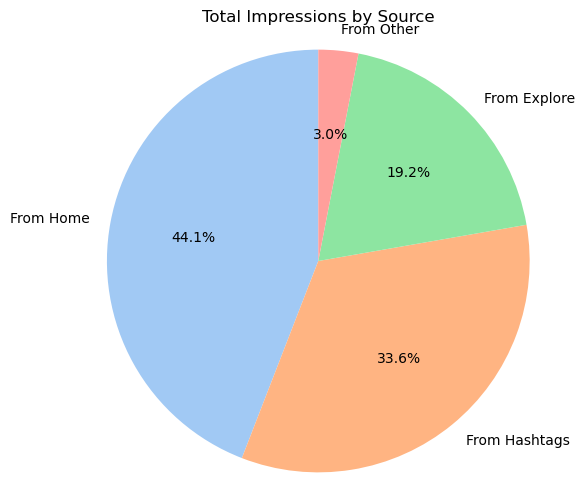

In [10]:
# Labels for the sources
labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
values = data[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum()
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Total Impressions by Source')
plt.axis('equal')  # To ensure the pie is a perfect circle
plt.show()

This pie chart shows the percentage contribution of each source to the total number of impressions across all posts. It helps us understand where most users are seeing the posts—whether from their home feed, hashtags, explore page, or other sources.

<h3>4.Correlation Matrix
    

In [11]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


The Correlation Matrix above shows the correlation between Instagram metrics like Likes, Comments, Shares, Impressions, and more.<br>
Key points:<br>
<li>Values close to 1 mean strong positive correlation.
<li>Values close to 0 mean no strong relationship.
<li>This helps us understand which features are related and might influence each other (e.g., higher Likes often relate to higher Follows or Impressions).<br><br>
From this we Can Understand Impressions are highly correlated with From Explore, Follows, Likes, and From Home .Saves, Shares, and Profile Visits show moderate impact.Comments have almost no correlation, meaning higher impressions don’t always lead to more comments.

<h3>Feature Selection

In [12]:
x = data[['Likes', 'Comments', 'Shares', 'Saves']]  # Independent variables
y = data[['Impressions']]                    # Target variable
print(x)
print(y)

     Likes  Comments  Shares  Saves
0      162         9       5     98
1      224         7      14    194
2      131        11       1     41
3      213        10       7    172
4      123         5       4     96
..     ...       ...     ...    ...
114    373         2      38    573
115    148         4       1    135
116     92         0       1     36
117    549         2      75   1095
118    443         5      26    653

[119 rows x 4 columns]
     Impressions
0           3920
1           5394
2           4021
3           4528
4           2518
..           ...
114        13700
115         5731
116         4139
117        32695
118        36919

[119 rows x 1 columns]


In [13]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

<h3>Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,\
ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

In [15]:
 models=({
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
   " DecisionTreeRegressor":DecisionTreeRegressor(),
   " GradientBoostingRegressor":GradientBoostingRegressor(),
   " AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "PassiveAggresiveRegressor":PassiveAggressiveRegressor()
})


In [16]:
    
for name,model in models.items():
    scores = cross_val_score(model,x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model :{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average=np.mean(rmse)
    print("Average RMSe: ",rmse_average)
    print("*"*100)

cross validation model :LinearRegression
Average RMSe:  2557.896611727955
****************************************************************************************************
cross validation model :Ridge
Average RMSe:  2557.817546826696
****************************************************************************************************
cross validation model :LinearSVR
Average RMSe:  2055.156275598526
****************************************************************************************************
cross validation model : DecisionTreeRegressor
Average RMSe:  2325.831440518613
****************************************************************************************************
cross validation model : GradientBoostingRegressor
Average RMSe:  2026.6748108976722
****************************************************************************************************
cross validation model : AdaBoostRegressor
Average RMSe:  2102.5790599757406
*************************************************

Insights:<br>
Gradient Boosting gave the lowest RMSE, meaning it's the most accurate among the tested models.
Tree-based models (like Random Forest, Decision Tree) performed better than simple linear models.
Passive Aggressive Regressor had the highest error, suggesting it’s not suitable for this dataset.<br>
So here we are using GradientBoostingRegressor

In [17]:
model =GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
# Predict
y_pred = model.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 =r2_score(y_test,y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 1963605.7206127627
R² Score: 0.9494407938725923


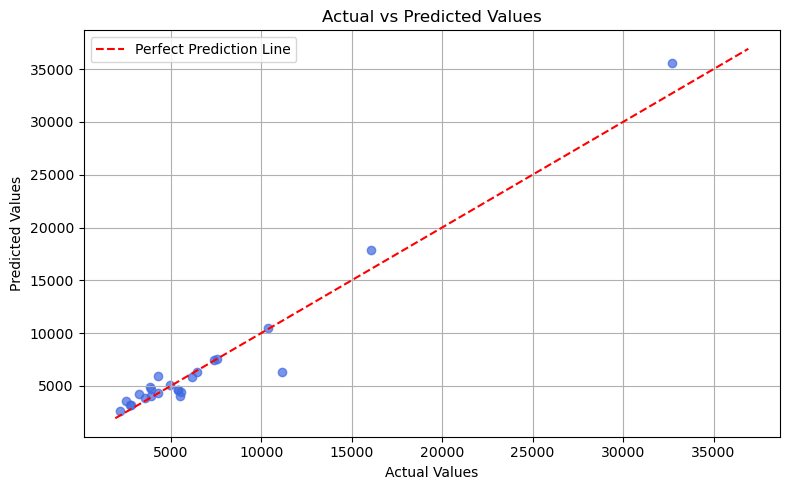

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test,y_pred, color='royalblue', alpha=0.7)
plt.plot([y.min(),y.max()],[y.min(),y.max()] ,'--r', label='Perfect Prediction Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This is a scatter plot comparing actual vs predicted values from a regression model.<br>
Explanation of the Plot:<br>
<li>x-axis: Actual values from the test set (y_test)
<li>Y-axis: Predicted values by the model (y_pred)
<li>Blue Dots: Each dot represents one data point, with its actual and predicted values.
<li>Red Dashed Line: This is the perfect prediction line, where predicted = actual.<br>

What This Tells Us:<br>
<li>Dots close to the red line → The model predicted well for those points.

<li>Dots far from the red line → The model’s prediction had a large error for those points.

<li>In this plot, most points lie close to the red line, indicating:
<ul type="circle">
<li>Good predictive accuracy overall.

<li>Some outliers (dots far from the line), especially at higher actual values, suggest a few predictions are less accurate at the upper range.
    </ul>


<h3>Conclusion:</h3>


The model performs reasonably well, especially for lower and mid-range values. However, it may struggle slightly with higher-value predictions, where a few points deviate more from the perfect line.